In [3]:
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import mglearn
import matplotlib.pyplot as plt
import numpy as np


In [12]:

reviews = [
    "В магазине всегда находишь что-то уникальное. Широкий ассортимент и последние тренды моды делают его отличным местом для шопинга. Обслуживание тоже на высоте!",
    "Приятно удивлена качеством одежды. Цены приемлемые, а вещи прочные и стильные. Отличный магазин для тех, кто ценит сочетание качества и доступности.",
    "Персонал очень дружелюбный и готов всегда помочь с выбором. У них есть отличные акции, и качество одежды на высоком уровне. Люблю это место!",
    "Здесь можно найти базовые вещи, но выбор не такой впечатляющий, как в других местах. Цены адекватные.",
    "Ничего особенного, обычные вещи, цены тоже стандартные. Ничего, что бы заставило вернуться снова.",
    "Купил пару вещей, и они разошлись после первой стирки. Качество оставляет желать лучшего, и возврат денег не принимают.",
    "Это дорогое удовольствие. Неудобные примерочные и высокие цены делают поход в этот магазин неудовольствием. Найдешь лучшее в другом месте.",
    "Магазин впечатляет разнообразием и стилем. Здесь всегда можно обновить гардероб с актуальными трендами. Персонал дружелюбный, а обслуживание на уровне.",
    "Магазин порадовал доступными ценами и при этом качественной одеждой. Отличное место для тех, кто ценит экономию без ущерба стилю.",
    "Магазин предлагают не только стильные, но и удобные вещи. Очень радует, что можно выглядеть модно, не теряя комфорта.",
    "Магазин  предлагает стандартный выбор. Ничего выдающегося, но можно найти базовые вещи. Цены приемлемые.",
    "Обычное место для шопинга. Ничего особенного, но и недостатков нет.",
    "В магазине персонал проявил полное халатное отношение. Ни вежливости, ни помощи с выбором. Очень разочарован.",
    "Купил блузку, и через пару дней начались раздражения на коже. Качество ткани оставляет желать лучшего. Возврат, к сожалению, невозможен.",
    "В этом магазине всегда можно отыскать что-то особенное. Богатый выбор и стильные новинки радуют глаз. Обслуживание также на высоте!",
    "Очень доволен(а) качеством одежды. Цены приемлемые, а вещи прочные и стильные. Отличное место для шопинга с хорошим соотношением цены и качества.",
    "Магазин предлагает стандартный ассортимент. Ничего выдающегося, но можно найти необходимые вещи по разумным ценам.",
    "Здесь можно найти обычные вещи, цены соответствуют среднему уровню. Ничего, что бы выделяло этот магазин среди других.",
    "Радует качество одежды и дружелюбный персонал. Цены здесь вполне адекватные, что делает магазин привлекательным для постоянных покупателей.",
    "Цены в этом магазине явно завышены, а выбор оставляет желать лучшего. Не самый лучший выбор для тех, кто ценит соотношение цены и качества.",
    "Обожаю этот магазин за своевременные новинки. Всегда можно найти что-то актуальное. Отличное соотношение цены и качества.",
    "Покупаю здесь уже не первый раз. Очень довольна качеством и сервисом. Рекомендую этот магазин всем своим друзьям.",
    "Заказывала в этом магазине подарок подруге. Все пришло в срок, аккуратно упаковано. Она осталась в восторге от стиля и качества вещей.",
    "Отличный магазин! Очень красивые и стильные вещи по доступным ценам. Обслуживание на высоте, персонал дружелюбный и готов помочь с выбором. Всегда нахожу здесь что-то уникальное.",
]

In [13]:
words = []
for review in reviews:
    words += review.split()

word_counts = collections.Counter(words)
print(word_counts.most_common(10))

[('и', 23), ('можно', 8), ('для', 7), ('в', 7), ('на', 6), ('Цены', 6), ('магазин', 6), ('цены', 6), ('магазине', 5), ('с', 5)]


In [14]:
vect = CountVectorizer()
X = vect.fit_transform(reviews)

print(X.shape)

(24, 210)


In [15]:


lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=42)
document_topics = lda.fit_transform(X)

In [16]:
lda.components_.shape

(10, 210)

In [17]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [18]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5,
                           n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
цены          цены          ничего        всегда        это           
ничего        ничего        но            можно         место         
найти         найти         найти         магазин       дружелюбный   
место         место         базовые       этот          качество      
магазин       магазин       шопинга       обслуживание  этот          
магазине      магазине      место         то            персонал      
вещи          вещи          выбор         на            готов         
можно         можно         цены          здесь         помочь        
отличное      отличное      приемлемые    что           выбором       
этом          этом          вещи          новинки       очень         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
мага

In [23]:
lda100 = LatentDirichletAllocation(n_components=110, learning_method="batch", max_iter=15, random_state=47)
document_topics100 = lda100.fit_transform(X)

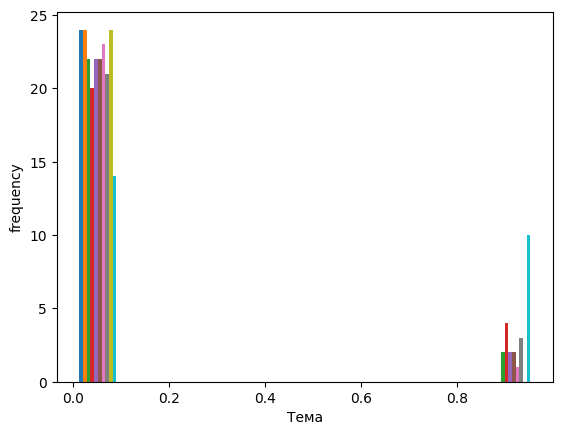

In [27]:
#График распределения тем в документах: данный график отражает частоту встречаемости каждой темы в документах. Его можно использовать для оценки значимости каждой темы в контексте документов.
plt.hist(document_topics, bins=10)
plt.xlabel("Тема")
plt.ylabel("frequency")
plt.show()

In [28]:
topics = np.array([6, 13, 21, 25, 24, 36, 39, 42, 50, 55, 59, 86, 99])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 6       topic 13      topic 21      topic 25      topic 24      topic 36      topic 39      
--------      --------      --------      --------      --------      --------      --------      
явно          явно          явно          явно          упаковано     явно          явно          
за            за            за            за            осталась      за            за            
местом        местом        местом        местом        подруге       местом        местом        
место         место         место         место         подарок       место         место         
месте         месте         месте         месте         магазине      месте         месте         
местах        местах        местах        местах        заказывала    местах        местах        
магазине      магазине      магазине      магазине      срок          магазине      магазине      
магазин       магазин       магазин       магазин       все           магазин       магазин       
люблю     

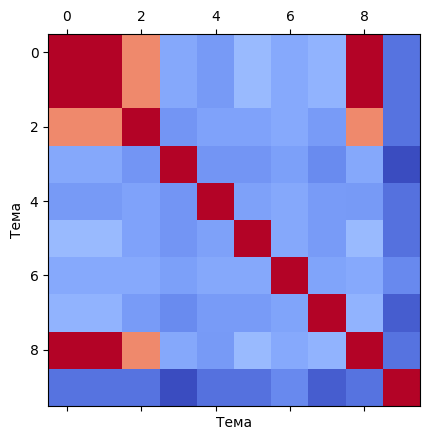

In [35]:
#График корреляции тем: представленная визуализация отображает степень взаимосвязи между различными темами. Этот инструмент может быть полезен для выявления групп тем, обладающих взаимосвязью между собой.
correlation = np.corrcoef(document_topics.T)

plt.matshow(correlation, cmap="coolwarm")
plt.xlabel("Тема")
plt.ylabel("Тема")
plt.show()

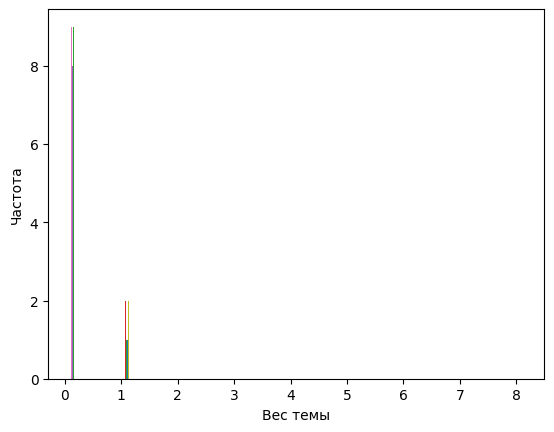

In [36]:
# Диаграмма распределения весов тем: представленный график иллюстрирует, как веса тем распределены в зависимости от их значений. Этот инструмент может быть использован для оценки степени выраженности каждой темы в документах.
plt.hist(lda.components_, bins=100)
plt.xlabel("Вес темы")
plt.ylabel("Частота")
plt.show()

Выводы

Мешок слов - это удобный и эффективный метод представления текстовой данных. Он может применяться для разнообразных задач обработки естественного языка, включая классификацию, кластеризацию и тематическое моделирование.

В данном случае мешок слов может быть использован для анализа отзывов о магазинах. Например, можно использовать мешок слов для определения того, какие темы являются наиболее важными для посетителей магазинов в Санкт-Петербурге.